In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [2]:
df = pd.read_csv('../data/mag/infomkt_sf_medrent_puma.csv')

In [3]:
df.columns

Index(['geoid', 'puma', 'b1_19', 'b2_19', 'b3_19', 'b4_19', 'b1_20', 'b2_20',
       'b3_20', 'b4_20', 'b1_21', 'b2_21', 'b3_21', 'b4_21', 'b1_22', 'b2_22',
       'b3_22', 'b4_22', 'b1_1922', 'b2_1922', 'b3_1922', 'b4_1922',
       'b1p_1922', 'b2p_1922', 'b3p_1922', 'b4p_1922'],
      dtype='object')

## Map prices

In [4]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/PUMAS_mask.geojson')

In [5]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
geo.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475..."
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874..."


### join data to geo files

In [7]:
df = pd.merge(geo,df,how='left',left_on='joinid',right_on='geoid')

In [8]:
df.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,geoid,puma,b1_19,b2_19,b3_19,b4_19,b1_20,b2_20,b3_20,b4_20,b1_21,b2_21,b3_21,b4_21,b1_22,b2_22,b3_22,b4_22,b1_1922,b2_1922,b3_1922,b4_1922,b1p_1922,b2p_1922,b3p_1922,b4p_1922
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,Phoenix (Far North) & Peoria (Northwest) Citie...,1200.0,1450,1650.0,2095.0,987.5,1495,1750,2195.0,1452.5,1725.0,2200.0,2590.0,NaN,1997.5,2430,2895.0,0.0,373.5,582.0,548.6,0.000000,0.229988,0.314935,0.233805
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,"Maricopa County--Scottsdale (North), Phoenix (...",1195.0,1895,2400.0,3250.0,1250.0,1900,2550,3425.0,1595.0,2350.0,3000.0,4000.0,1800.0,2700.0,3500,4447.5,461.6,577.6,812.0,807.5,0.344889,0.272145,0.302083,0.221841


In [9]:
df.describe()

,ALAND20,AWATER20,joinid,geoid,b1_19,b2_19,b3_19,b4_19,b1_20,b2_20,b3_20,b4_20,b1_21,b2_21,b3_21,b4_21,b1_22,b2_22,b3_22,b4_22,b1_1922,b2_1922,b3_1922,b4_1922,b1p_1922,b2p_1922,b3p_1922,b4p_1922
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,985.900000,1266.600000,1652.166667,2102.266667,983.821429,1334.533333,1762.666667,2189.500000,1136.333333,1508.766667,2069.300000,2593.700000,1327.464286,1765.966667,2376.400000,2959.300000,224.358667,347.374667,525.973333,604.761333,0.225945,0.248341,0.288899,0.268919
std,1.990223e+08,9.764382e+05,5.235411,5.235411,175.749233,266.996201,326.773822,632.288160,166.364244,251.689113,356.535245,604.573699,237.747740,310.683800,371.524648,684.606268,267.531268,366.944549,435.078449,803.370685,252.241083,110.357199,97.719946,195.120254,0.267973,0.068444,0.048359,0.089054
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,697.000000,900.000000,1155.000000,1350.000000,750.000000,995.000000,1250.000000,1472.500000,800.000000,1195.000000,1572.000000,1855.000000,975.000000,1295.000000,1797.000000,2097.500000,-188.680000,170.000000,432.600000,344.000000,-0.162141,0.101190,0.207386,0.147959
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,862.500000,1079.500000,1460.000000,1647.500000,850.000000,1197.500000,1575.000000,1757.250000,937.500000,1256.250000,1911.250000,2135.750000,1104.375000,1586.000000,2130.000000,2393.500000,122.000000,290.750000,461.300000,512.300000,0.101023,0.216259,0.255008,0.223462
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,987.500000,1250.000000,1595.000000,1932.500000,975.000000,1295.000000,1700.000000,2045.000000,1150.000000,1450.000000,2000.000000,2450.000000,1287.250000,1695.000000,2250.000000,2720.000000,174.000000,301.000000,500.800000,548.600000,0.147959,0.246280,0.282051,0.249345
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,1075.000000,1425.000000,1740.000000,2306.250000,1095.000000,1497.500000,1810.000000,2399.500000,1250.000000,1656.250000,2100.000000,2848.750000,1558.625000,1923.750000,2465.000000,3122.500000,358.680000,404.750000,553.500000,669.300000,0.294469,0.281626,0.313796,0.296671
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,1295.000000,1895.000000,2400.000000,3500.000000,1300.000000,1900.000000,2550.000000,3425.000000,1595.000000,2350.000000,3000.000000,4000.000000,1800.000000,2700.000000,3500.000000,4500.000000,779.000000,577.600000,812.000000,1173.500000,0.869420,0.407211,0.389147,0.445767


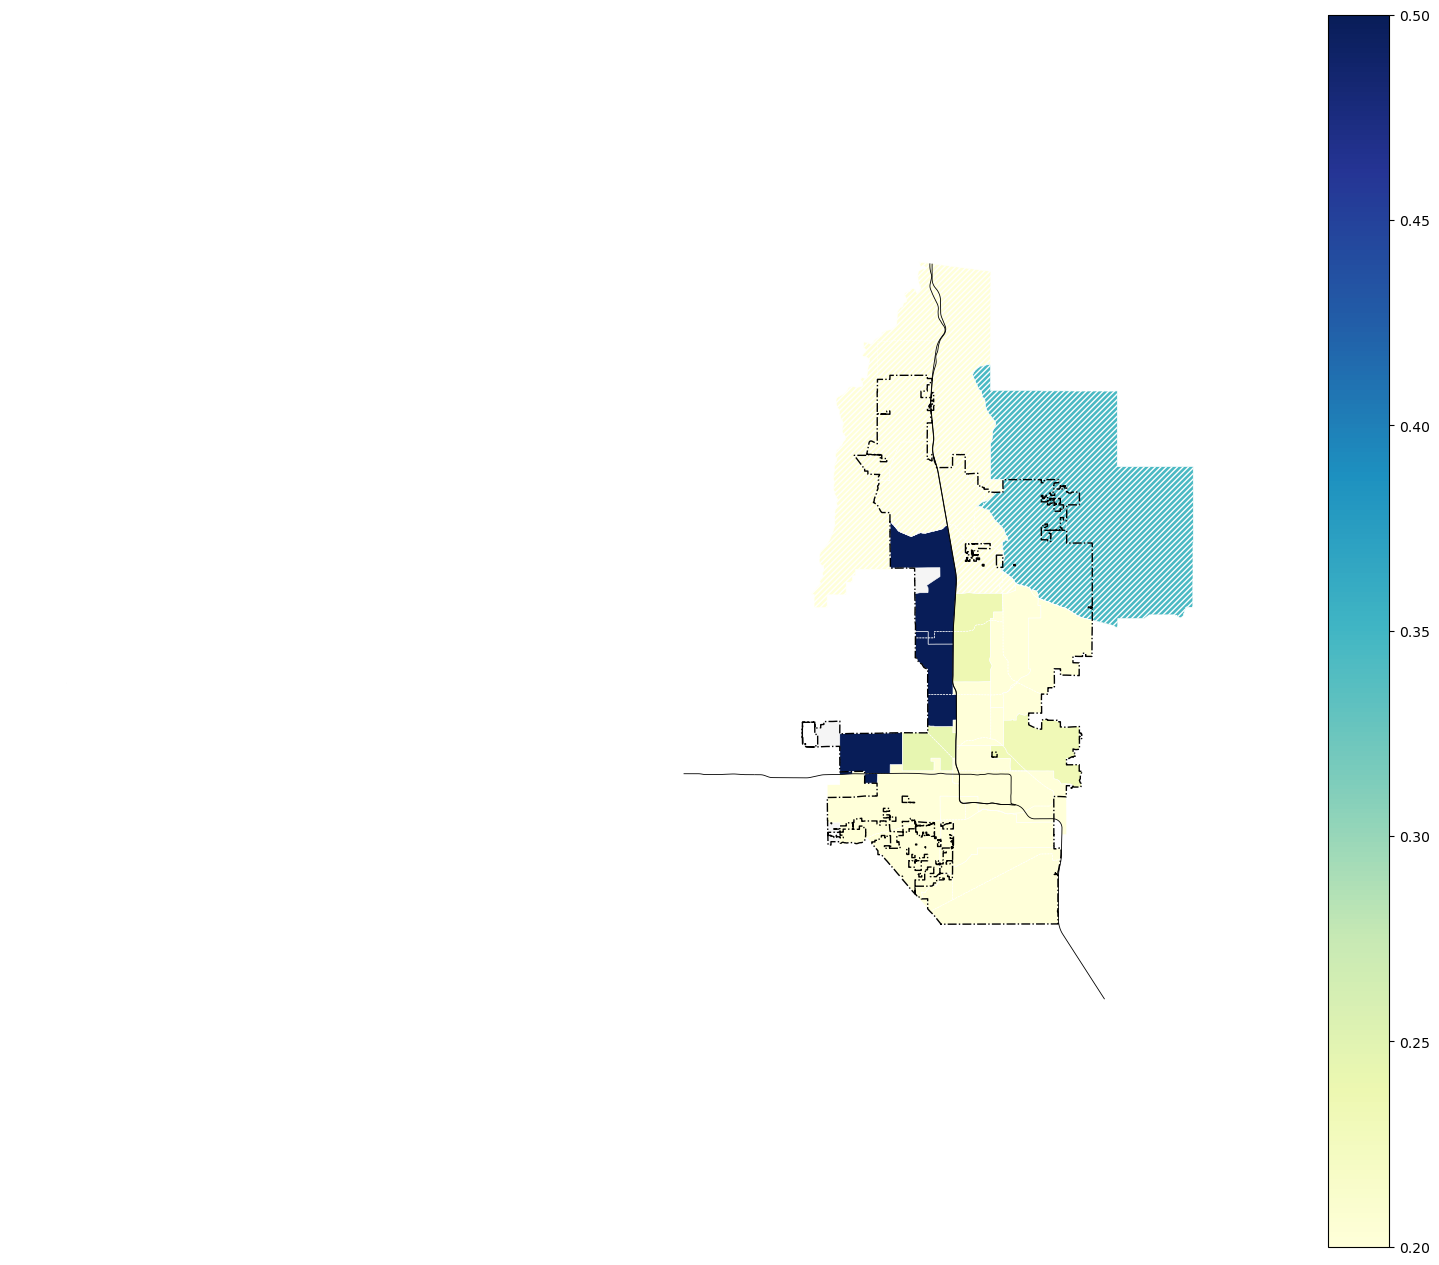

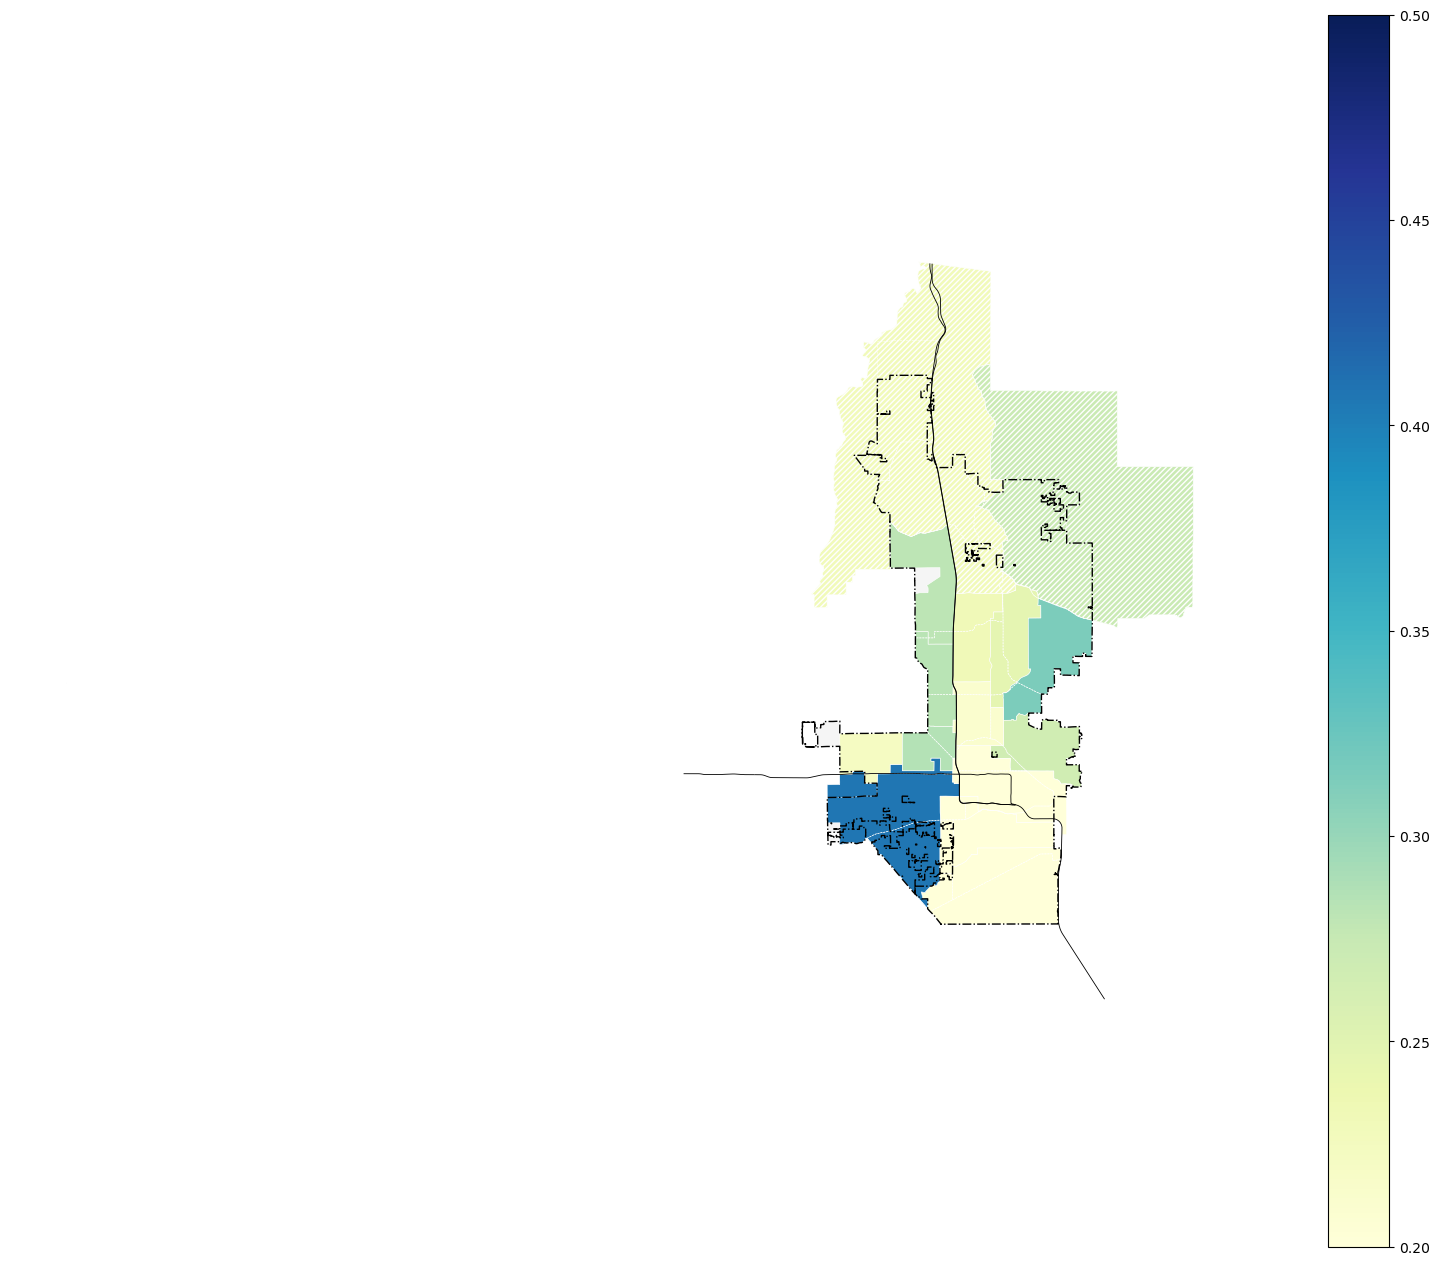

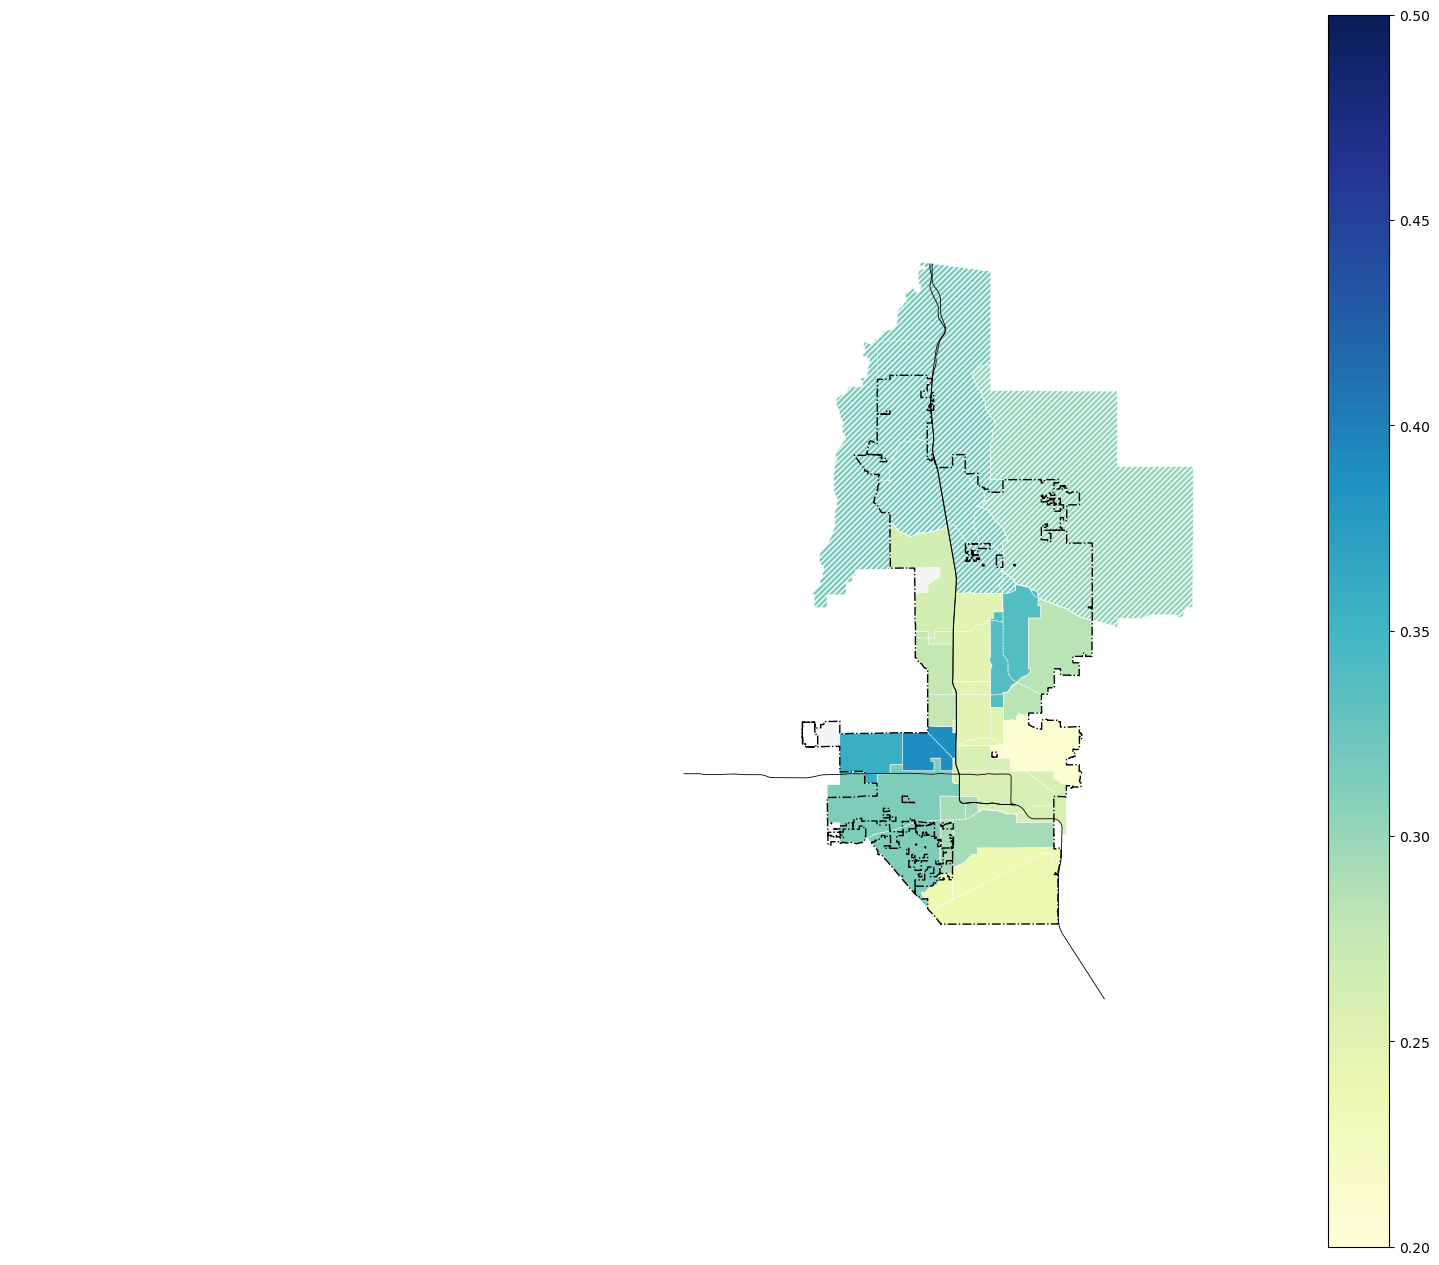

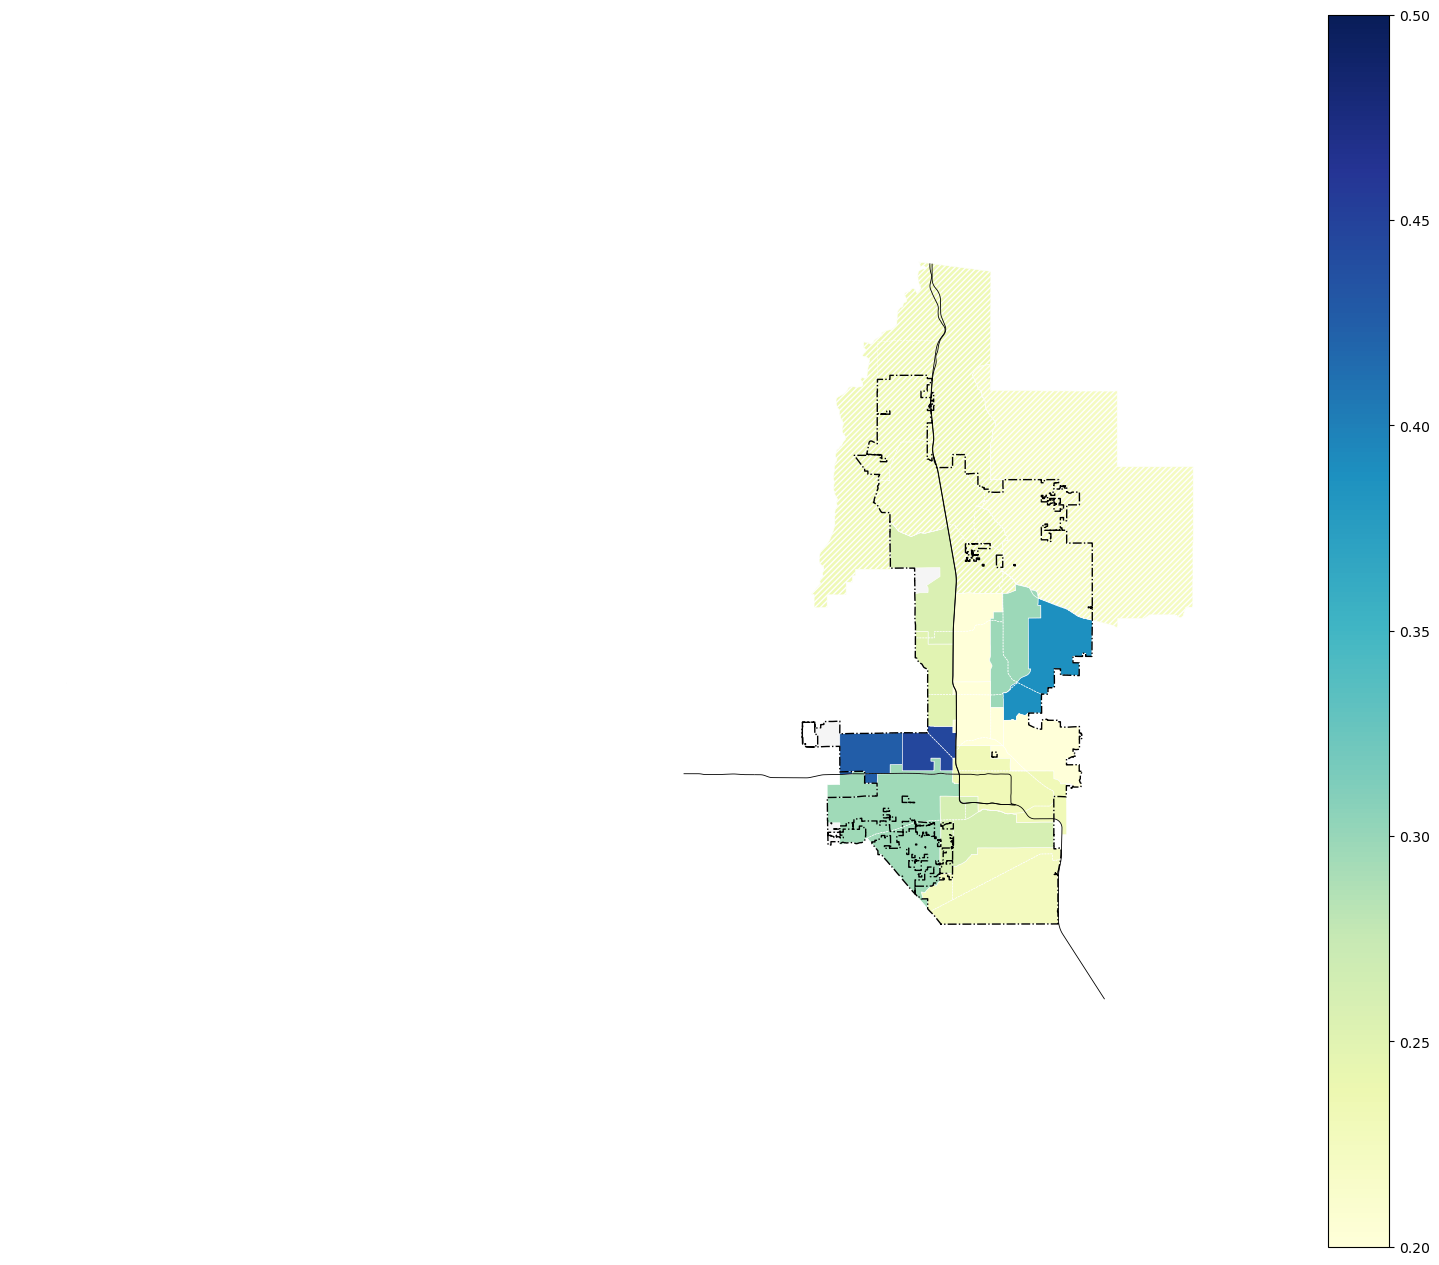

In [10]:
for size in ['1','2','3','4']: 
    fig, ax = plt.subplots(1, figsize = (20,16))
    ax.axis('off')
    new_norm = plt.Normalize(vmin=.2,vmax=.5)
    sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
    sm.set_array([])
    phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
    df.plot(column = f'b{size}p_1922', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.4, ax=ax)
    mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
    villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
    phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
    road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
    fig.colorbar(sm)
    plt.savefig(f'img/rent_sf_{size[:2]}_0820.jpg', dpi = 300) # saving each